# Módulo de preprocesamiento 
Ammi Beltrán & Fernanda Borja

## 1

In [67]:
import os
import mne
import glob
#
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import copy

In [8]:
if not os.path.exists("data"):
    os.makedirs("data")
    print("Data directory created :D")

In [ ]:
# EDFDIR = "D:\\OneDrive\\OneDrive - Universidad de Chile\\Semestre X\\Inteligencia\\Proyecto\\dataset\\tuh_eeg"

In [9]:
EDFDIR = "c:\\Users\\TheSy\\Desktop\\tuh_eeg"

In [10]:
files = glob.glob(EDFDIR + '/**/*.edf', recursive=True)

In [73]:
# Usamos MNE
data = mne.io.read_raw_edf(files[0])
raw_data = data.get_data()
info = data.info
channels = data.ch_names

Extracting EDF parameters from c:\Users\TheSy\Desktop\tuh_eeg\aaaaaaaa\s001_2015_12_30\01_tcp_ar\aaaaaaaa_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [ ]:
def preprocessing(path):
    ''' 
    Pipeline de procesamiento c:
    -Canales
    -Filtrado
    -Downsample
    -Crop temporal (primer minuto y a los 11 minutos) 
    -Segmentación 
    -
    '''

    #21 canales
    CHANNELS = ['EEG FP1-REF','EEG FP2-REF',
                'EEG F7-REF','EEG F8-REF','EEG F4-REF','EEG F3-REF','EEG FZ-REF',
                'EEG A1-REF','EEG A2-REF','EEG O1-REF','EEG O2-REF',
                'EEG T6-REF','EEG T5-REF','EEG T4-REF','EEG T3-REF',
                'EEG C4-REF','EEG C3-REF','EEG CZ-REF',
                'EEG P4-REF','EEG P3-REF','EEG PZ-REF',
                ]
    
    


In [ ]:
def channel_select(data,channels):
    '''
    Selects channels from array 
    '''
    extracted = data.pick(channels)
    return extracted

In [ ]:
def eeg_filter(data, lfreq = 0.3, hfreq= 80):
    '''
    
    '''
    data_copy = copy.copy(data)
    filtered = data_copy.filter(l_freq = lfreq,
                                h_freq = hfreq,
                                method = "iir"
                                )
    return filtered

In [71]:
def temporal_crop(data, tin,tfin):
    ''' 
    Cut the channels from the second "tin" to "tfin"
    '''
    data_copy = copy.copy(data)
    croped = data_copy.crop(tmin = tin, tmax = tfin,)
    return croped

In [36]:
info

<Info | 8 non-empty values
 bads: []
 ch_names: EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-REF, EEG C3-REF, ...
 chs: 31 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2015-12-30 14:44:21 UTC
 nchan: 31
 projs: []
 sfreq: 256.0 Hz
 subject_info: 3 items (dict)
>

In [49]:
# info["sfreq"]
info["bads"]

[]

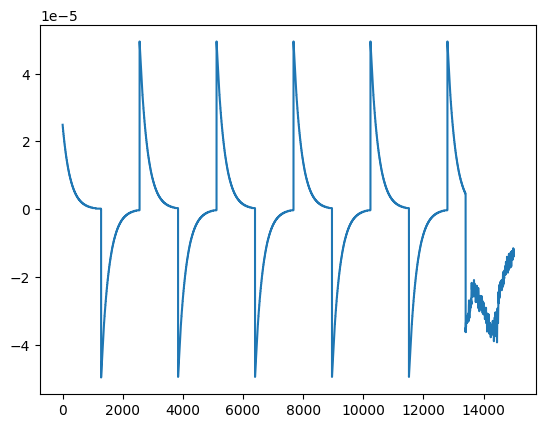

In [32]:
# plt.plot(raw_data[0][:250*60])
# plt.show()